In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import Lasso, LassoCV
import scipy.stats as stats
import statsmodels.stats.api as sms

In [26]:
# load data
os.chdir('C:/Users/Mayin\Documents/1GRADUATE/1. Study/2. 24Spring/5291 Aadvanced Statistical Analysis/5291 Project/')
x_train = pd.read_csv('x_train_scale.csv')
y_train = pd.read_csv('y_train_scale.csv')
x_test = pd.read_csv('x_test_scale.csv')
y_test = pd.read_csv('y_test_scale.csv')

In [29]:
# data summary
x_train.head()
y_train.head()
# x_train.describe()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,6,-0.198540,0,-1.638719,0.619703,0.740882,0.805863,0.477598,0.805846,0.386256,0.327007,0.627476,0.221878,0.176381,0.627731,0.865211,-1.501928,1.094804,0.152882,0.460537
1,40,2.290131,1,0.655123,-0.298646,-0.402497,-0.371813,-0.324201,-0.370755,0.008842,-0.054711,0.000760,0.096563,0.088192,0.000516,-0.171078,0.141061,0.563995,-0.647206,-0.704918
2,42,-0.424783,0,1.200335,-0.401872,-0.334106,-0.355812,-0.302748,-0.356888,-0.303740,-0.384378,-0.273194,-0.258995,-0.311665,-0.273187,-0.395026,0.396319,-0.975836,-0.107599,-0.425094
3,20,0.253946,0,-1.517513,-0.341360,-0.450510,-0.269406,-0.283977,-0.270483,-0.366642,-0.349676,-0.345998,-0.333344,-0.382316,-0.346241,-0.366610,0.872582,-1.650297,1.076994,-0.357844
4,4,1.045796,0,0.280279,0.011030,-0.013089,0.060215,-0.026543,0.061270,1.407744,1.424449,1.646735,1.797604,1.713175,1.646738,0.018249,-0.334498,-0.328069,0.337224,0.641197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,39,0.140824,0,1.119181,-0.248813,-0.272694,-0.243805,-0.246435,-0.242748,0.201408,0.253266,0.271712,0.101960,0.148321,0.271717,-0.390436,0.434092,-0.664014,0.012047,-0.203466
4696,30,-1.782240,0,-1.631783,0.196123,0.427960,0.236226,0.163850,0.237280,-0.501323,-0.024347,-0.606442,-0.567185,-0.474013,-0.606435,-0.250256,-0.006744,-0.402811,0.407288,-0.292139
4697,19,-1.103512,0,-0.729965,3.771633,4.998966,4.623710,2.204549,4.624735,0.677614,0.769454,0.896927,0.517476,0.482538,0.896681,0.566238,-0.952701,0.071645,1.530151,2.781620
4698,28,1.045796,1,1.398628,-0.174064,-0.482612,-0.013390,-0.133807,-0.014468,-0.406390,-0.518847,-0.295711,-0.394502,-0.561200,-0.295954,-0.327567,0.098831,0.259786,1.017524,-0.766206


In [41]:
# 2 responses
y_t_train = y_train['total_UPDRS']
y_t_test = y_test['total_UPDRS']
y_m_train = y_train['motor_UPDRS']
y_m_test = y_test['motor_UPDRS']

## total_UPDRS

In [43]:
# candidate lambdas
Lambdas = np.logspace(-5, 2, 200)

# store coeddicients
lasso_cofficients = []
for Lambda in Lambdas:
    lasso = Lasso(alpha=Lambda, normalize=True, max_iter=10000)
    lasso.fit(x_train, y_t_train)
    lasso_cofficients.append(lasso.coef_)

c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previou

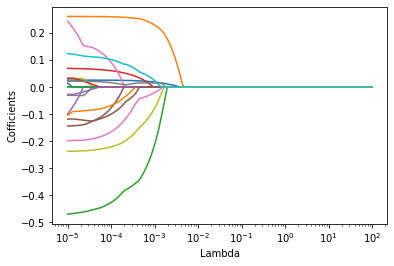

In [45]:
# Plot lambda
plt.plot(Lambdas, lasso_cofficients)

# log x-axis
plt.xscale('log')

plt.xlabel('Lambda')
plt.ylabel('Cofficients')
plt.show()

In [46]:
# Cross Validation: 10-fold
lasso_cv = LassoCV(alphas=Lambdas, normalize=True, cv=10, max_iter=10000)
lasso_cv.fit(x_train, y_t_train)

# best lambda
lasso_best_alpha = lasso_cv.alpha_  
print(lasso_best_alpha)

1.9116440753857038e-05


c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.43799668745168674, tolerance: 0.42449985588327993
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_s

In [47]:
# LASSO modeling with best lambda
lasso = Lasso(alpha=lasso_best_alpha, normalize=True, max_iter=10000)
lasso.fit(x_train, y_t_train)

c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=1.9116440753857038e-05, max_iter=10000, normalize=True)

In [50]:
# return coefficients
lasso_coeff = pd.Series(index=['Intercept'] + x_train.columns.tolist(), data=[lasso.intercept_] + lasso.coef_.tolist())
print(lasso_coeff)

Intercept       -0.397967
subject#         0.025345
age              0.260089
sex             -0.463773
test_time        0.067638
Jitter(%)       -0.027881
Jitter(Abs)     -0.141304
Jitter:RAP       0.176939
Jitter:PPQ5     -0.031719
Jitter:DDP       0.031649
Shimmer          0.000000
Shimmer(dB)      0.000000
Shimmer:APQ3    -0.089416
Shimmer:APQ5     0.000000
Shimmer:APQ11    0.025231
Shimmer:DDA     -0.021587
NHR             -0.120951
HNR             -0.197092
RPDE             0.020559
DFA             -0.236384
PPE              0.116823
dtype: float64


<AxesSubplot:>

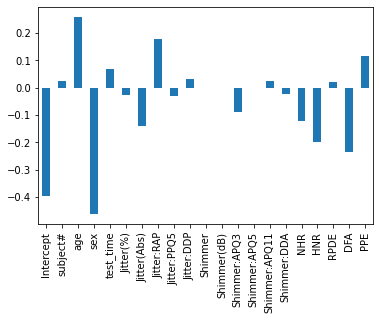

In [52]:
# plot importance
lasso_coeff.plot(kind='bar')

In [54]:
# prediction & evaluation
y_t_pred_test = lasso.predict(x_test)
y_t_pred_train = lasso.predict(x_train)

print('LASSO R2(train):', lasso.score(x_train, y_t_train))
print('LASSO train MSE:', np.mean((y_t_pred_train - y_t_train) ** 2))
print('LASSO test MSE:', np.mean((y_t_pred_test - y_t_test) ** 2))

LASSO R2(train): 0.2581375086901083
LASSO train MSE: 0.7418624913098917
LASSO test MSE: 0.7870404555118405


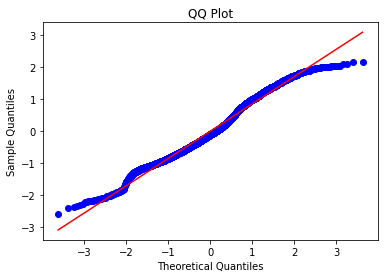

In [80]:
#  QQ plot

residuals = y_t_train - y_t_pred_train
stats.probplot(residuals, dist="norm", plot=plt)

plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

In [81]:
bp_test = sms.het_breuschpagan(residuals, x_train)

lm, lm_pvalue, fvalue, f_pvalue = bp_test

print(f'LM statistic: {lm}')
print(f'LM-test p-value: {lm_pvalue}')
print(f'F statistic: {fvalue}')
print(f'F-test p-value: {f_pvalue}')

LM statistic: 1821.620939684695
LM-test p-value: 0.0
F statistic: 148.0900503214212
F-test p-value: 0.0


model has heteroskedasticity

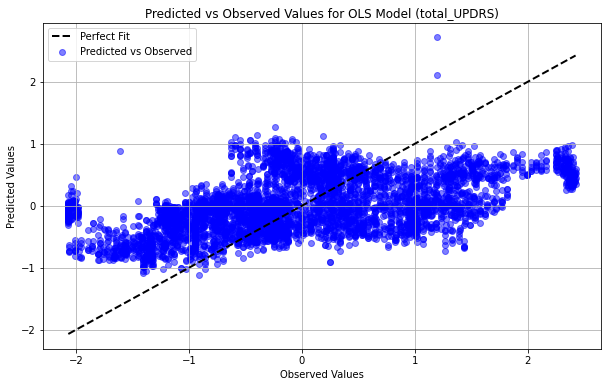

In [95]:
# plot train
y_pred = y_t_pred_train
y_actual = y_t_train
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_pred, alpha=0.5, color='blue', label='Predicted vs Observed')  # Plotting the points

# Plot the line of perfect prediction
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2, label='Perfect Fit')  # Line from min to max of observed

# Labeling the axes
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Observed Values for OLS Model (total_UPDRS) on trainset')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


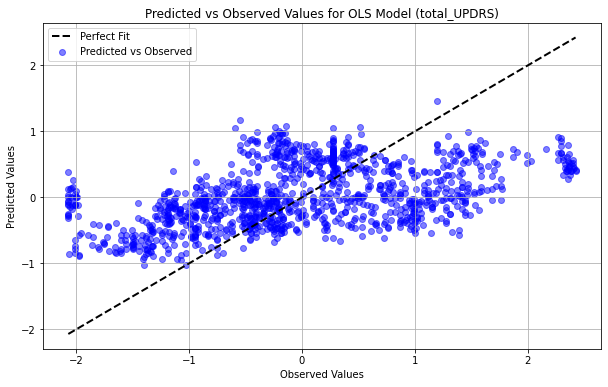

In [96]:
# plot test
y_pred = y_t_pred_test
y_actual = y_t_test
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_pred, alpha=0.5, color='blue', label='Predicted vs Observed')  # Plotting the points

# Plot the line of perfect prediction
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2, label='Perfect Fit')  # Line from min to max of observed

# Labeling the axes
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Observed Values for OLS Model (total_UPDRS) on testset')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## motor_UPDRS

In [82]:
# candidate lambdas
Lambdas = np.logspace(-5, 2, 200)

# store coeddicients
lasso_cofficients = []
for Lambda in Lambdas:
    lasso = Lasso(alpha=Lambda, normalize=True, max_iter=10000)
    lasso.fit(x_train, y_m_train)
    lasso_cofficients.append(lasso.coef_)

c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.

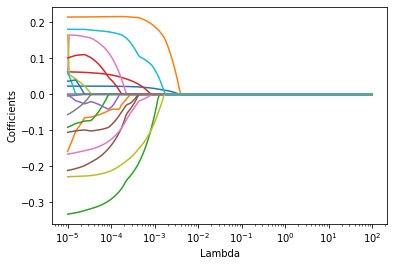

In [83]:
# Plot lambda
plt.plot(Lambdas, lasso_cofficients)

# log x-axis
plt.xscale('log')

plt.xlabel('Lambda')
plt.ylabel('Cofficients')
plt.show()

In [85]:
# Cross Validation: 10-fold
lasso_cv = LassoCV(alphas=Lambdas, normalize=True, cv=10, max_iter=10000)
lasso_cv.fit(x_train, y_m_train)

c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.46213722445281746, tolerance: 0.4238712035335906
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4662668510968615, tolerance: 0.4249874167053558
  model = cd_fast.enet_coordinate_descent_gram(


4.297004704320844e-05


c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4272022037048373, tolerance: 0.41885818870227026
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.428900182264897, tolerance: 0.426920296405242
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler

In [86]:
# best lambda
lasso_best_alpha = lasso_cv.alpha_  
print(lasso_best_alpha)

4.297004704320844e-05


In [87]:
# LASSO modeling with best lambda
lasso = Lasso(alpha=lasso_best_alpha, normalize=True, max_iter=10000)
lasso.fit(x_train, y_m_train)

c:\Users\Mayin\Downloads\python\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=4.297004704320844e-05, max_iter=10000, normalize=True)

In [88]:
# return coefficients
lasso_coeff = pd.Series(index=['Intercept'] + x_train.columns.tolist(), data=[lasso.intercept_] + lasso.coef_.tolist())
print(lasso_coeff)

Intercept       -0.391706
subject#         0.022866
age              0.215578
sex             -0.314199
test_time        0.059377
Jitter(%)        0.000000
Jitter(Abs)     -0.182102
Jitter:RAP       0.150164
Jitter:PPQ5     -0.000000
Jitter:DDP       0.001545
Shimmer          0.000000
Shimmer(dB)      0.000000
Shimmer:APQ3    -0.059962
Shimmer:APQ5    -0.060480
Shimmer:APQ11    0.092942
Shimmer:DDA     -0.023912
NHR             -0.100353
HNR             -0.149122
RPDE            -0.000000
DFA             -0.224174
PPE              0.177784
dtype: float64


<AxesSubplot:>

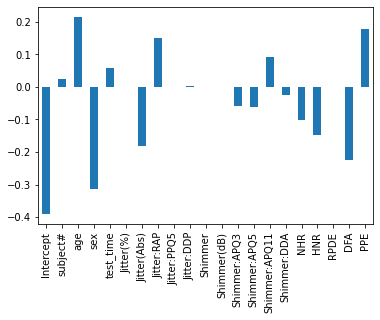

In [89]:
# plot importance
lasso_coeff.plot(kind='bar')

In [92]:
# prediction & evaluation
y_m_pred_test = lasso.predict(x_test)
y_m_pred_train = lasso.predict(x_train)

print('LASSO R2(train):', lasso.score(x_train, y_m_train))
print('LASSO train MSE:', np.mean((y_m_pred_train - y_m_train) ** 2))
print('LASSO test MSE:', np.mean((y_m_pred_test - y_m_test) ** 2))

LASSO R2(train): 0.21784084080405208
LASSO train MSE: 0.7821591591959483
LASSO test MSE: 0.8297074572616497


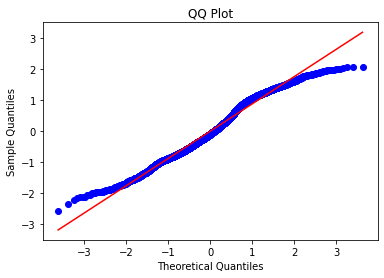

In [93]:
#  QQ plot
residuals = y_m_train - y_m_pred_train
stats.probplot(residuals, dist="norm", plot=plt)

plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

plt.show()

In [94]:
# Breusch pagan test
bp_test = sms.het_breuschpagan(residuals, x_train)

lm, lm_pvalue, fvalue, f_pvalue = bp_test

print(f'LM statistic: {lm}')
print(f'LM-test p-value: {lm_pvalue}')
print(f'F statistic: {fvalue}')
print(f'F-test p-value: {f_pvalue}')

LM statistic: 1859.6356745226924
LM-test p-value: 0.0
F statistic: 153.20384921578142
F-test p-value: 0.0


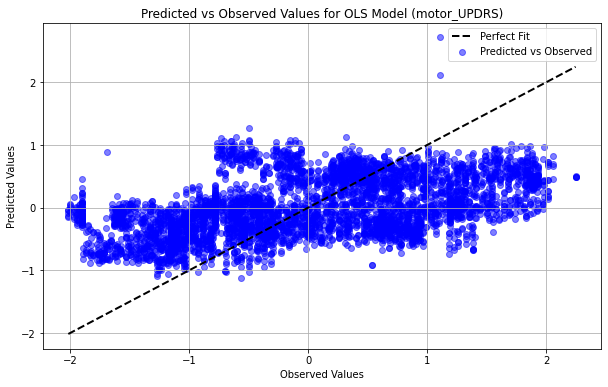

In [98]:
# plot train
y_pred = y_m_pred_train
y_actual = y_m_train
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_pred, alpha=0.5, color='blue', label='Predicted vs Observed')  # Plotting the points

# Plot the line of perfect prediction
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2, label='Perfect Fit')  # Line from min to max of observed

# Labeling the axes
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Observed Values for OLS Model (motor_UPDRS) on trainset')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

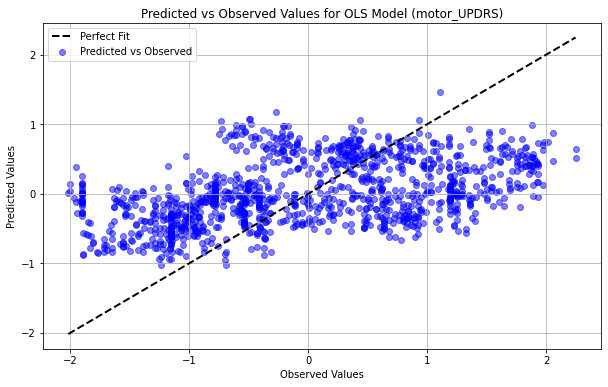

In [100]:
# plot test
y_pred = y_m_pred_test
y_actual = y_m_test
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_actual, y_pred, alpha=0.5, color='blue', label='Predicted vs Observed')  # Plotting the points

# Plot the line of perfect prediction
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'k--', lw=2, label='Perfect Fit')  # Line from min to max of observed

# Labeling the axes
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Observed Values for OLS Model (motor_UPDRS) on testset')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
